1. Построить график изменения количества имен Ruth и Robert с 1900 по 2000

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
DATA_PATH = 'C:/Temp/names/'

In [3]:
names_by_year = {}
for year in range(1900, 2001, 1):
    names_by_year[year] = pd.read_csv(DATA_PATH + 'yob{}.txt'.format(year),names=['Name','Gender','Count'])
names_all = pd.concat(names_by_year, names=['Year', 'Pos'])

In [4]:
name_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()

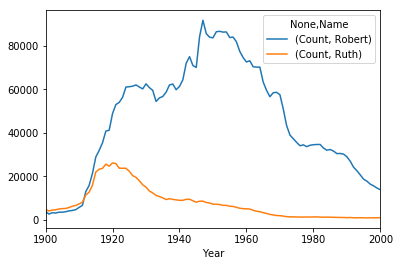

In [5]:

name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name').plot()

2. Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000).

In [6]:
names_by_year = {}
for year in range(1900, 2001, 5):
    names_by_year[year] = pd.read_csv(DATA_PATH + 'yob{}.txt'.format(year),names=['Name','Gender','Count'])
names_all = pd.concat(names_by_year, names=['Year', 'Pos'])

In [7]:
name_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()

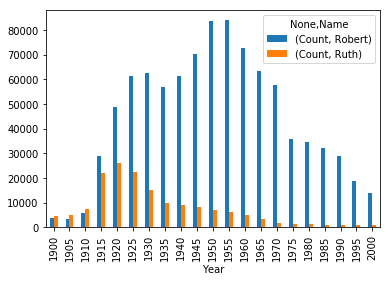

In [8]:

name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name').plot.bar()

3. Построить круговую диаграмму по количеству ТОП-10 популярных имен, начинающихся на R за 1950 год.

In [9]:
names_all = pd.read_csv(DATA_PATH + 'yob1950.txt', names=['Name','Gender','Count'])
names_R = names_all[names_all.Name.str.startswith("R")].head(10)
names_R_for_pie = names_R.groupby('Name').sum().sort_values(by='Count', ascending=False)
names_R_for_pie

,Count
Name,
Rebecca,9426
Ruth,7128
Rita,6425
Rose,5373
Roberta,3632
Rosemary,3457
Rhonda,2567
Ruby,2417
Regina,2166


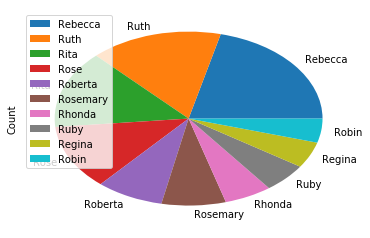

In [10]:
names_R_for_pie.plot.pie(y='Count')

4. Построить точечную диаграмму по количеству согласных букв в имени и частоте употребления за 100 лет.

In [11]:
def count_consonants(word):
    consonants = 0
    for letter in word:
        if letter.lower() not in 'aeiouy':
            consonants += 1
    return consonants

In [12]:
names_by_year = {}
for year in range(1900, 2001, 1):
    names_by_year[year] = pd.read_csv(DATA_PATH + 'yob{}.txt'.format(year),names=['Name','Gender','Count'])
names_all = pd.concat(names_by_year).groupby(['Name'], as_index=False).sum().sort_values(by='Count', ascending=False)

In [13]:
names_all['Len'] = names_all.apply(lambda row: count_consonants(row.Name), axis=1)
names_all.head(10)

,Name,Count,Len
27786,James,4810284,3
30686,John,4739898,3
53934,Robert,4638931,4
45352,Michael,4023398,4
43814,Mary,3853689,2
68406,William,3655345,4
15164,David,3351321,3
53613,Richard,2493115,5
31257,Joseph,2289760,4
10876,Charles,2189677,5


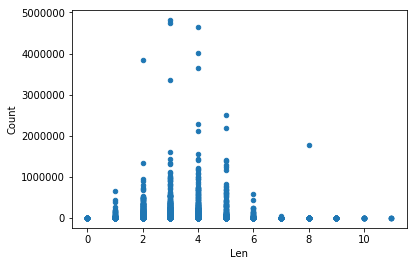

In [14]:
names_all.plot.scatter(x='Len', y='Count')